In [1]:
import os
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
tf_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    width_shift_range=0.0,
    height_shift_range=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale= 1/255

)

train_gen = tf_generator.flow_from_directory(

    os.getcwd()+"/skin_cancer/train",
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    

)

test_gen = tf_generator.flow_from_directory(
    os.getcwd()+"/skin_cancer/test",
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
)


Found 2967 images belonging to 3 classes.
Found 330 images belonging to 3 classes.


32
[0. 1. 0.]
(224, 224, 3)


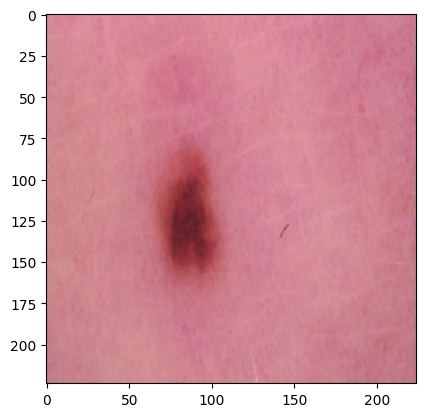

In [3]:
### test Generator
import matplotlib.pyplot as plt
import numpy as np
test_img = None
test_label = None
for image,label in test_gen:
    print(len(image))
    test_img = image[0]
    test_label = label[0]
    break
print(test_label)
print(test_img.shape)
plt.imshow(test_img)
plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam,RMSprop

input_shape = (224,224,3)
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape= input_shape),
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(128, activation= 'relu'),
    Dense(3, activation='sigmoid')
    
])

/Users/tharhtet/.local/share/virtualenvs/tensorflow_serveing-WFWV-CRM/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-31 10:44:43.834247: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-07-31 10:44:43.834275: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-07-31 10:44:43.834290: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-07-31 10:44:43.834350: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-31 10:44:43.834371: I tensorflow/core/common_runt

In [5]:
model.summary()
#tf.keras.utils.plot_model(model,show_shapes=True)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,756,195 (98.25 MB)

 Trainable params: 25,756,195 (98.25 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
import datetime

batch_size =  32
epochs  = 10


base_learning_rate = 1e-3 #0.0001
optimizer = Adam(learning_rate=base_learning_rate, decay=1e-4)

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])



/Users/tharhtet/.local/share/virtualenvs/tensorflow_serveing-WFWV-CRM/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [7]:
num_train = len(train_gen.filenames)
num_test = len(test_gen.filenames)
steps_per_epoch=int(num_train / batch_size)
print("Number of train : ",num_train)
print(num_test/batch_size)
print(steps_per_epoch)

Number of train :  2967
10.3125
92


In [8]:
history = model.fit(train_gen, steps_per_epoch=steps_per_epoch, epochs=epochs,
                            validation_data=test_gen,
                            validation_steps=int(num_test / batch_size),)

Epoch 1/10


2024-07-31 10:44:44.375537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/tharhtet/.local/share/virtualenvs/tensorflow_serveing-WFWV-CRM/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.5420 - loss: 1.5531 - val_accuracy: 0.6062 - val_loss: 0.6997
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.5625 - loss: 0.6119 - val_accuracy: 0.5000 - val_loss: 0.8608
Epoch 3/10


2024-07-31 10:44:58.921792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-31 10:44:58.921829: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_18/_48]]
2024-07-31 10:44:58.921838: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 696578435033572171
2024-07-31 10:44:58.921845: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7148746500797586423
2024-07-31 10:44:58.921848: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8221629189028917107
2024-07-31 10:44:58.921855: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 45904226697

92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 141ms/step - accuracy: 0.7097 - loss: 0.6380 - val_accuracy: 0.7156 - val_loss: 0.5871
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.7188 - loss: 0.6254 - val_accuracy: 0.6000 - val_loss: 0.6635
Epoch 5/10


2024-07-31 10:45:12.356382: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-31 10:45:12.356398: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8373527181349921524
2024-07-31 10:45:12.356403: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12577533029696615196
2024-07-31 10:45:12.356407: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12756150952002175836
2024-07-31 10:45:12.356410: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_8/_54]]
2024-07-31 10:45:12.356422: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 688075660

92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - accuracy: 0.7472 - loss: 0.5723 - val_accuracy: 0.7281 - val_loss: 0.6096
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.7812 - loss: 0.5959 - val_accuracy: 0.6000 - val_loss: 0.7948
Epoch 7/10


2024-07-31 10:45:25.777794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-31 10:45:25.777826: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8373527181349921524
2024-07-31 10:45:25.777830: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12756150952002175836
2024-07-31 10:45:25.777834: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2703365422002123866
2024-07-31 10:45:25.777837: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 501070472946598562
2024-07-31 10:45:25.777838: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/ArgMax/_

92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.7694 - loss: 0.5425 - val_accuracy: 0.5969 - val_loss: 1.0267
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.7188 - loss: 0.7429 - val_accuracy: 0.7000 - val_loss: 0.6586
Epoch 9/10


2024-07-31 10:45:39.488610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-31 10:45:39.488645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_8/_54]]
2024-07-31 10:45:39.488654: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2703365422002123866
2024-07-31 10:45:39.488658: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6880756602537271497
2024-07-31 10:45:39.488703: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4333977677900189221
2024-07-31 10:45:39.488710: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 82216291890

92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.7749 - loss: 0.5255 - val_accuracy: 0.6844 - val_loss: 0.7711
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.9062 - loss: 0.3551 - val_accuracy: 0.7000 - val_loss: 0.7248


2024-07-31 10:45:53.438629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-31 10:45:53.438645: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8373527181349921524
2024-07-31 10:45:53.438650: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4590422669734910614
2024-07-31 10:45:53.438653: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6880756602537271497
2024-07-31 10:45:53.438659: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7296993417972590281
2024-07-31 10:45:53.438662: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 696578435033572171
2024-07-31 10:45:53.438666: W tensorflow/core/framework/local_rendezvous

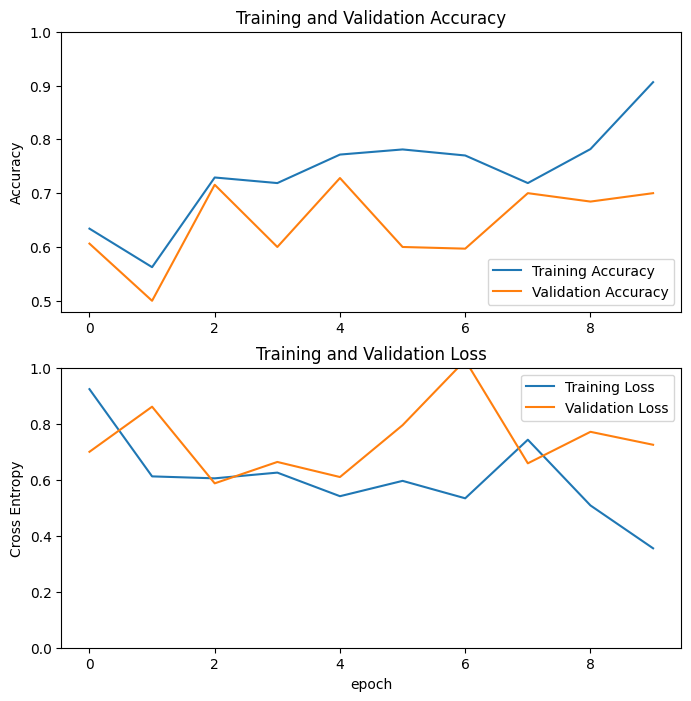

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()